In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string
import re
%matplotlib inline

In [ ]:
columns_to_keep =['Polarity','Tweet']
df = pd.read_csv("dataset.csv", usecols=columns_to_keep,encoding ='ISO-8859-1',error_bad_lines=False)

<ipython-input-6-faaa9ba3c3a6>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("dataset.csv", usecols=columns_to_keep,encoding ='ISO-8859-1',error_bad_lines=False)


In [ ]:
df.tail(50)

,Polarity,Tweet
1599950,4,OMG how good is ben and jerrys cookie dough ic...
1599951,4,oooo haha just waking up and ready to eat a de...
1599952,4,#Traveltuesday @GuyNGirlTravels Because their ...
1599953,4,any ideaZ on what to get dad for father's day ...
1599954,4,God works mysteriously!i learn that if u think...
1599955,4,@_CrC_ mornin.. I'm enjoying a beautiful morni...
1599956,4,Woke up feeling rested and refreshed today! It...
1599957,4,@naijagal You just HAD to throw that in. Tell ...
1599958,4,@siovene lol I don't blame you it's not the sa...
1599959,4,"@ashinynewcoin yeah, that'd be the one sorry ..."


In [ ]:
df.head()

,Polarity,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Polarity  1600000 non-null  int64 
 1   Tweet     1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
df['Polarity'].unique()

array([0, 4])

[Text(0, 0, 'Negative(0)'), Text(1, 0, 'Positive(4)')]

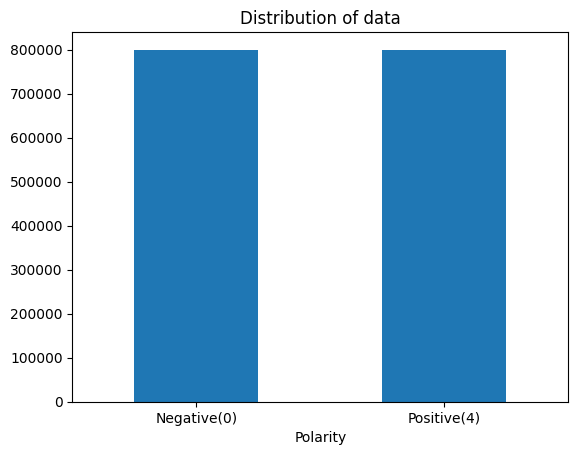

In [ ]:
visual = df.groupby('Polarity').count().plot(kind='bar', title='Distribution of data',legend=False)
visual.set_xticklabels(['Negative(0)','Positive(4)'],rotation = 0)

In [ ]:
df['Polarity'] = df['Polarity'].replace(4,1)

In [ ]:
data_pos = df[df['Polarity'] == 1]
data_neg = df[df['Polarity'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(100000)]
data_neg = data_neg.iloc[:int(100000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset.tail(50)

,Polarity,Tweet
99950,0,Wanna stay here n stop doing the bathrooms
99951,0,I wish I didn't work overnight. Y'all mutha fu...
99952,0,&amp; Danny's ending performance was just so b...
99953,0,never lose yourself in the game of love
99954,0,Trying to write an article on a topic you dont...
99955,0,Negative savings
99956,0,better clean that piss up.
99957,0,Just saw the last episode in this season of Lo...
99958,0,is gonna have a sad day... last full day of hi...
99959,0,@IcarusWingz i enjoy a dabble in the world of ...


In [ ]:
dataset['Tweet']=dataset['Tweet'].str.lower()

In [ ]:
dataset.tail(50)

,Polarity,Tweet
99950,0,wanna stay here n stop doing the bathrooms
99951,0,i wish i didn't work overnight. y'all mutha fu...
99952,0,&amp; danny's ending performance was just so b...
99953,0,never lose yourself in the game of love
99954,0,trying to write an article on a topic you dont...
99955,0,negative savings
99956,0,better clean that piss up.
99957,0,just saw the last episode in this season of lo...
99958,0,is gonna have a sad day... last full day of hi...
99959,0,@icaruswingz i enjoy a dabble in the world of ...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
custom_stopwords = set(['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves'])

In [ ]:
def removing_stopwords(tweet):
  stop_words = set(stopwords.words('english')).union(custom_stopwords)
  tokenized_words = nltk.word_tokenize(tweet)
  ret = [word for word in tokenized_words if word not in stop_words]
  return ' '.join(ret)


In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(removing_stopwords)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
99950,0,wan na stay n stop bathrooms
99951,0,wish n't work overnight . y'all mutha fukkas m...
99952,0,& amp ; danny 's ending performance beautiful ...
99953,0,never lose game love
99954,0,trying write article topic dont understand tri...
99955,0,negative savings
99956,0,better clean piss .
99957,0,saw last episode season lost . incredible ... ...
99958,0,gon na sad day ... last full day high school ...
99959,0,@ icaruswingz enjoy dabble world rival schools...


In [ ]:
dataset.reset_index(inplace = True, drop = True)
dataset

,Polarity,Tweet
0,1,love @ health4uandpets u guys r best ! !
1,1,im meeting one besties tonight ! cant wait ! !...
2,1,"@ darealsunisakim thanks twitter add , sunisa ..."
3,1,sick really cheap hurts much eat real food plu...
4,1,@ lovesbrooklyn2 effect everyone
...,...,...
199995,0,son developed new habit waking 5:30am 'm secon...
199996,0,looks like routers broke tweets fone
199997,0,really dont want college right .. wish sunny ! !
199998,0,@ flossa * offers pepto *


In [ ]:
def removing_punctuation(Tweet):
   translator = str.maketrans('', '', string.punctuation)
   return Tweet.translate(translator)



In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
dataset['Tweet']= dataset['Tweet'].apply(lambda letter: removing_punctuation(letter))

In [ ]:
dataset

,Polarity,Tweet
0,1,love health4uandpets u guys r best
1,1,im meeting one besties tonight cant wait g...
2,1,darealsunisakim thanks twitter add sunisa g...
3,1,sick really cheap hurts much eat real food plu...
4,1,lovesbrooklyn2 effect everyone
...,...,...
199995,0,son developed new habit waking 530am m second ...
199996,0,looks like routers broke tweets fone
199997,0,really dont want college right wish sunny
199998,0,flossa offers pepto


In [ ]:
def remove_repeating_chars(Tweet):
    return  re.sub(r'(.)\1+', r'\1', Tweet)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
199950,0,wan na stay n stop bathrooms
199951,0,wish nt work overnight yall mutha fukkas maki...
199952,0,amp danny s ending performance beautiful bt...
199953,0,never lose game love
199954,0,trying write article topic dont understand tri...
199955,0,negative savings
199956,0,better clean piss
199957,0,saw last episode season lost incredible cant...
199958,0,gon na sad day last full day high school
199959,0,icaruswingz enjoy dabble world rival schools ...


In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(remove_repeating_chars)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
199950,0,wan na stay n stop bathroms
199951,0,wish nt work overnight yal mutha fukas makin g...
199952,0,amp dany s ending performance beautiful btw s...
199953,0,never lose game love
199954,0,trying write article topic dont understand tricky
199955,0,negative savings
199956,0,beter clean pis
199957,0,saw last episode season lost incredible cant b...
199958,0,gon na sad day last ful day high schol
199959,0,icaruswingz enjoy dable world rival schols ev...


In [ ]:
def removing_numbers(Tweet):
    Tweet = re.sub(r'\d+', '', Tweet)
    return Tweet


In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(removing_numbers)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
199950,0,wan na stay n stop bathroms
199951,0,wish nt work overnight yal mutha fukas makin g...
199952,0,amp dany s ending performance beautiful btw s...
199953,0,never lose game love
199954,0,trying write article topic dont understand tricky
199955,0,negative savings
199956,0,beter clean pis
199957,0,saw last episode season lost incredible cant b...
199958,0,gon na sad day last ful day high schol
199959,0,icaruswingz enjoy dable world rival schols ev...


In [ ]:
def remove_urls(Tweet):
    Tweet = re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', Tweet)
    return Tweet

In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(remove_urls)

In [ ]:
def tokenize_text(Tweet):
    tokens = nltk.word_tokenize(Tweet)
    return tokens

In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(tokenize_text)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
199950,0,"[wan, na, stay, n, stop, bathroms]"
199951,0,"[wish, nt, work, overnight, yal, mutha, fukas,..."
199952,0,"[amp, dany, s, ending, performance, beautiful,..."
199953,0,"[never, lose, game, love]"
199954,0,"[trying, write, article, topic, dont, understa..."
199955,0,"[negative, savings]"
199956,0,"[beter, clean, pis]"
199957,0,"[saw, last, episode, season, lost, incredible,..."
199958,0,"[gon, na, sad, day, last, ful, day, high, schol]"
199959,0,"[icaruswingz, enjoy, dable, world, rival, scho..."


In [ ]:
nltk.download('wordnet')
stemmer = nltk.PorterStemmer()
def stemming_text(Tweet):
    return [stemmer.stem(word) for word in Tweet]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_word(Tweet):
    return [lemmatizer.lemmatize(word) for word in Tweet]


In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(stemming_text)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
199950,0,"[wan, na, stay, n, stop, bathrom]"
199951,0,"[wish, nt, work, overnight, yal, mutha, fuka, ..."
199952,0,"[amp, dani, s, end, perform, beauti, btw, stay..."
199953,0,"[never, lose, game, love]"
199954,0,"[tri, write, articl, topic, dont, understand, ..."
199955,0,"[neg, save]"
199956,0,"[beter, clean, pi]"
199957,0,"[saw, last, episod, season, lost, incred, cant..."
199958,0,"[gon, na, sad, day, last, ful, day, high, schol]"
199959,0,"[icaruswingz, enjoy, dabl, world, rival, schol..."


In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(lemmatize_word)

In [ ]:
dataset.tail(50)

,Polarity,Tweet
199950,0,"[wan, na, stay, n, stop, bathrom]"
199951,0,"[wish, nt, work, overnight, yal, mutha, fuka, ..."
199952,0,"[amp, dani, s, end, perform, beauti, btw, stay..."
199953,0,"[never, lose, game, love]"
199954,0,"[tri, write, articl, topic, dont, understand, ..."
199955,0,"[neg, save]"
199956,0,"[beter, clean, pi]"
199957,0,"[saw, last, episod, season, lost, incred, cant..."
199958,0,"[gon, na, sad, day, last, ful, day, high, schol]"
199959,0,"[icaruswingz, enjoy, dabl, world, rival, schol..."


In [ ]:
X = dataset['Tweet'].values
y = dataset['Polarity'].values

In [ ]:
X

array([list(['love', 'healthuandpet', 'u', 'guy', 'r', 'best']),
       list(['im', 'mete', 'one', 'besti', 'tonight', 'cant', 'wait', 'girl', 'talk']),
       list(['darealsunisakim', 'thank', 'twiter', 'ad', 'sunisa', 'got', 'met', 'hin', 'show', 'dc', 'area', 'swetheart']),
       ...,
       list(['reali', 'dont', 'want', 'coleg', 'right', 'wish', 'suni']),
       list(['flosa', 'ofer', 'pepto']),
       list(['josiehobo', 'would', 'so', 'nt', 'revis'])], dtype=object)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
len(tokenizer.word_index)

120883

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train

[[103878, 8726, 654, 270, 569, 296, 5237, 51, 329, 233, 90, 3992],
 [496, 24, 3562, 3237, 845, 28, 13936, 2148, 4],
 [118, 5643],
 [34, 668, 443, 3904, 34, 2180, 22, 54, 863, 2212],
 [14, 87328, 287, 903, 2, 43],
 [75887, 822, 141, 15],
 [51, 1056, 431, 244, 317, 55, 73, 198, 770, 413, 10, 7259, 12, 3, 6],
 [93067, 93, 2196, 250, 793, 49, 2, 571],
 [114192, 184, 22, 4, 72, 43, 363, 332, 51, 16],
 [25, 41, 101, 5, 2763, 25, 101, 5, 2763, 1456, 1032, 15, 207],
 [5123, 148, 1629, 718, 185, 137, 62, 188, 5, 43, 544, 29, 2, 53],
 [139, 10, 261, 394, 471, 356, 48, 5, 112],
 [42103, 21, 63, 31, 100, 1231, 42104, 4063],
 [106602, 28, 827, 2253, 127, 297],
 [19564, 5, 524, 1305, 580, 3807, 1442, 23, 15, 3271],
 [13429, 69763, 739, 60, 46, 62, 27, 175, 20332, 467, 32, 1810, 69764],
 [76190,
  216,
  4,
  6860,
  76191,
  3949,
  4091,
  79,
  4496,
  1331,
  76192,
  1,
  76193,
  284,
  478,
  514,
  76194,
  48],
 [31, 29, 2, 52, 6482, 1161, 1161, 194, 218],
 [14589, 91, 1541, 6],
 [72241, 2, 

In [ ]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [ ]:
X_train

array([[    0,     0,     0, ...,   233,    90,  3992],
       [    0,     0,     0, ..., 13936,  2148,     4],
       [    0,     0,     0, ...,     0,   118,  5643],
       ...,
       [    0,     0,     0, ...,   491,   229,   200],
       [    0,     0,     0, ...,   286,     4,    61],
       [    0,     0,     0, ...,    19,     3,    17]], dtype=int32)

In [ ]:
D = 20
T = X_train.shape[1]
V = len(tokenizer.word_index)

In [ ]:
model = Sequential()
model.add(Embedding(V + 1, D, input_length=T))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 100, 20)           2417680   
                                                                 
 conv1d_73 (Conv1D)          (None, 98, 32)            1952      
                                                                 
 max_pooling1d_50 (MaxPooli  (None, 32, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_74 (Conv1D)          (None, 30, 64)            6208      
                                                                 
 max_pooling1d_51 (MaxPooli  (None, 10, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_75 (Conv1D)          (None, 8, 128)          

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9
)
custom_optimizer = Adam(learning_rate=lr_schedule)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=1000)

Epoch 1/5
160/160 [==============================] - 33s 202ms/step - loss: 0.6113 - accuracy: 0.6514 - val_loss: 0.5619 - val_accuracy: 0.7033
Epoch 2/5
160/160 [==============================] - 33s 206ms/step - loss: 0.4947 - accuracy: 0.7565 - val_loss: 0.5804 - val_accuracy: 0.6931
Epoch 3/5
160/160 [==============================] - 32s 200ms/step - loss: 0.3796 - accuracy: 0.8231 - val_loss: 0.6509 - val_accuracy: 0.6811
Epoch 4/5
160/160 [==============================] - 33s 207ms/step - loss: 0.2981 - accuracy: 0.8610 - val_loss: 0.7333 - val_accuracy: 0.6690
Epoch 5/5
160/160 [==============================] - 32s 201ms/step - loss: 0.2460 - accuracy: 0.8849 - val_loss: 0.8192 - val_accuracy: 0.6690


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [ ]:
y_pred=model.predict(X_test)
y_pred

1250/1250 [==============================] - 4s 3ms/step


array([[0.6111417 ],
       [0.9641278 ],
       [0.71348643],
       ...,
       [0.9791532 ],
       [0.08877687],
       [0.99851346]], dtype=float32)

In [ ]:
y_pred=[1 if prob >= 0.5 else 0 for prob in y_pred]
y_pred

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


Text(0.5, 1.0, 'Confusion Matrix')

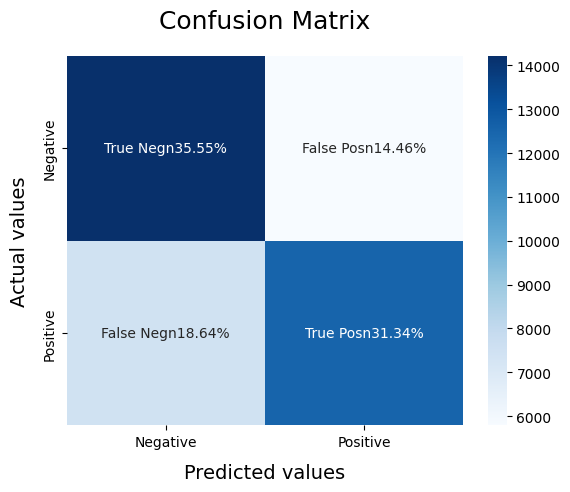

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)